In [1]:
from scipy.stats import iqr
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carregamento do datset
boston = load_boston()

X = boston.data

Text(0.5,1,'Boxplot from BHP')

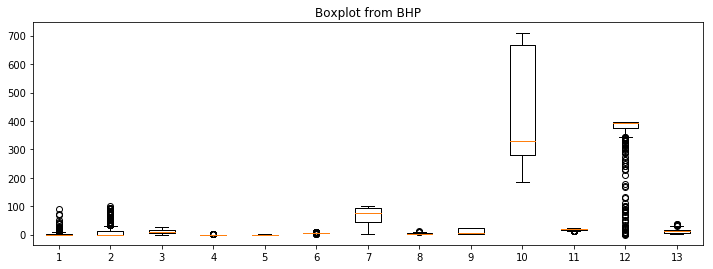

In [3]:
#tamanho padrao da janela do grafico
plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.boxplot(X)
plt.title('Boxplot from BHP')

/home/mateus/Programs/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


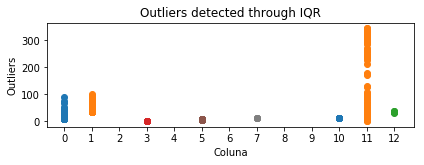

In [6]:
#declaracao das variaveis que serao utilizdas no laço
feat = 0
outliers = []


#laço principal que passara por todas as 13 colunas do dataset
while feat < 13:

    #valores do primeiro e do terceiro quartil (Q1 e Q3)
    q1, q3 = np.percentile(X[:, feat], [25, 75])

    #valor da amplitude interquartil (IQR) tambem poderia ser obtida por Q3 - Q1
    IQR = iqr(X[:, feat])

    #estrutur auxiliar para o armzenamento dos outliers
    auxVet = []

    #laco que passara por todos os elemento da coluna de indice 'feat' em busco de outliers
    #valores que sao menores que q1 - 1.5*IQR ou maiores que q3 + 1.5*IQR
    for number in X[:, feat]:
        if number < q1 - 1.5*IQR or number > q3 + 1.5*IQR:
            auxVet.append(number)

    #array que sera preenchido com o numero da coluna corrente e sera utilizado na plotagem
    col = np.empty(auxVet.__len__())
    col.fill(feat)

    plt.subplot(2, 1, 2)
    #plot dos outliers x -> numero da coluna, y -> valores dos outliers
    plt.scatter(col, auxVet)

    #preenchimento da estrutura principal com os outliers
    outliers.append(auxVet)

    feat += 1
    
#configurações gerais do grafico
x1 = np.arange(feat)
plt.title('Outliers detected through IQR')
plt.xlabel('Coluna')
plt.ylabel('Outliers')
plt.xticks(x1)

plt.tight_layout()
plt.show()